<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Noer Ardiansyah Laksana // Data Science 1 Assigment</font></h1>

#### Import package yang dibutuhkan



##### Install package yang belum ada di environment laptop

In [2]:
import numpy as np
import pandas as pd
from PIL import Image as img
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
import seaborn as sns
from scipy import stats

### Load data yang akan divisualisasi

In [5]:
df = pd.read_csv('london_crime_by_lsoa.csv')
print('Data berhasil terbaca')


Data berhasil terbaca


### Analisis bentuk data yang akan divisualisasi

In [5]:
### bagaimana bentuk data yang akan digunakan?

df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
df.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

##### Agar lebih memudahkan visualisasi maka kita harus melakukan transpose terhadap data, dan merubah nilai year dan month menjadi object

In [13]:
df_new= pd.read_csv('london_crime_by_lsoa.csv', dtype={'year':str, 'month':str})
print('Data berhasil diubah untuk year dan month')

Data berhasil diubah untuk year dan month


In [14]:
# Lihat apakah sudah berubah atau belum

df_new.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year              object
month             object
dtype: object

In [15]:
# Ok aman, kemudian mari kita describe data dengan transpose data ini

df_new.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180
year,13490604,9,2016,1498956
month,13490604,12,11,1124217


#### Insight data

--- Dari data diatas terlihat bahwa major category kejahatan yang paling banyak terjadi di kota london adalah Theft and Handling, dan banyak terjadi di yahun 2016 ---

# 1. Visulasisasi dengan Pie Chart

### Pertanyaan : 

--- Jenis kejahatan apa yang sering terjadi di Kota London? ---

In [19]:
df_majorctg = df_new.groupby('major_category', axis=0).sum()
df_majorctg

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


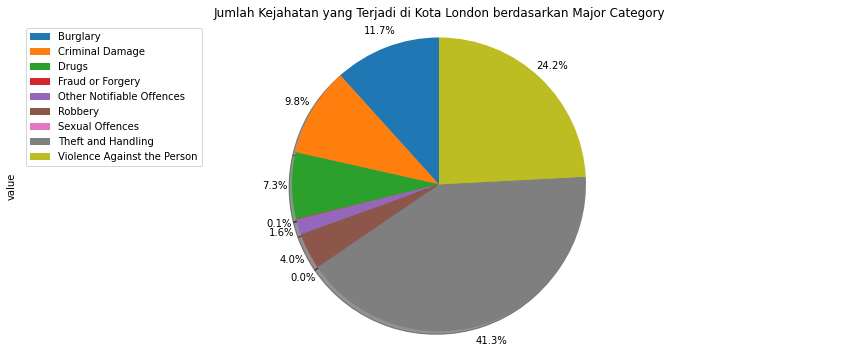

In [22]:
df_majorctg['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,

                        )
plt.title("Jumlah Kejahatan yang Terjadi di Kota London berdasarkan Major Category", y=1)
plt.axis('equal')
plt.legend(labels=df_majorctg.index, loc='upper left')
plt.show()

In [26]:
df_minorctg = df_new.groupby('minor_category', axis=0).sum()
df_minorctg

,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


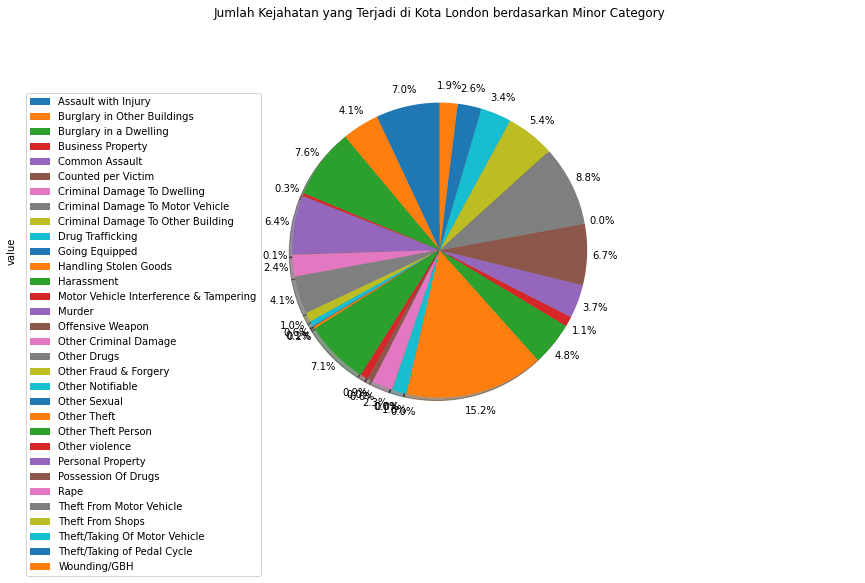

In [28]:
df_minorctg['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,

                        )
plt.title("Jumlah Kejahatan yang Terjadi di Kota London berdasarkan Minor Category", y=1.2)
plt.axis('equal')
plt.legend(labels=df_minorctg.index, loc='upper left')
plt.show()

#### --- Insight Pie Chart ---

Pada 2 pie chart diatas menunjukan bahwa kejahatan yang sering terjadi di Kota London berdasarkan Kategori Major Category adalah Theft and Handling atau bisa disebut dengan Pencurian dan Pembegalan di Indonesia

Kemudian untuk Pie chart yang didasarkan pada Minor Category, jenis kejahatan yang sering terjadi di Kota London adalah Handling Stolen and Goods atau mencuri bareng-barang berharga.

# 2. Visulisasi dengan Histogram

### Question

--- Berapa nilai jumlah kejahatan yang sering keluar pada seluruh wilayah di Kota London? ---

In [29]:
df_year = df_new.groupby('year', axis=0).sum()
df_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


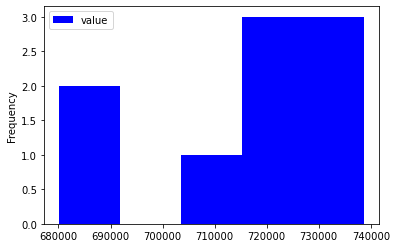

In [30]:

df_year.plot(kind='hist', bins=5, color='blue');

#### -- Insight Histogram --
Dari data histogram diatas bahwa terlihat, jumlah tingkat kejahatan yang terjadi dari tahun 2008 - 2016 pada data yang ada sering terjadi pada angka 715.000 - 735.000 pada setiap tahunnya.

# 3. Visualisasi dengan Barchart


Pertanyaan : 

--- Dari tahun 2008 - 2016, manakah tahun yang paling berbahaya bagi warga yang berada di Kota London? ---

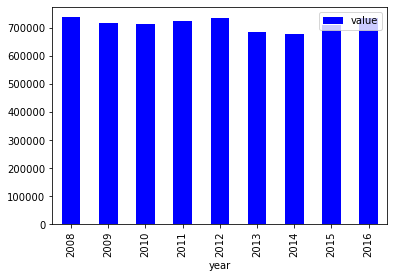

In [38]:
df_year.plot(kind='bar', color='blue');



#### --- Insight Bar Chart ---

Pada data yang disajikan menggunakan visualisasi barchart diatas dapat terlihat bahwa pada seluruh tahun dari 2008 - 2016 memiliki tingkat kejahatan yang hampir sama. Namun, tahun 2008, 2012, dan 2016 menjadi tahun dengan angka kejahatan tertinggi sepanjang periode tersebut.

# 4. Visualisasi dengan Box Plot

--- Bagaimana distribusi normal yang terjadi pada tingkat kejahatan yang terjadi di Kota London, pada rentang 2008 - 2016? ---

<AxesSubplot:>

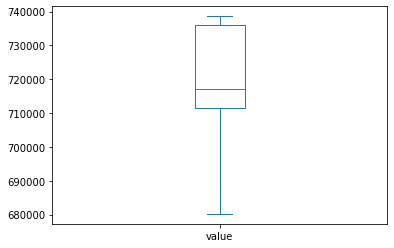

In [39]:
df_year.plot(kind = 'box')

### --- Insight Box Plot ---

Sama seperti analisis data melalui visulisasi histogram, pada box plot pun menyajikan hasil analisis bahwa dari tahun 2008 - 2016 jumlah kejahatan yang terjadi di kota London terjadi pada rentang 715.000 - 735.000 dengan nilai median berada di angka 717.000 +-. 

# 5. Visualisasi dengan Line Plot Plot

Question

--- Bagaimana perbandingan perkembangan tingkat kejahatan setiap bulan pada setiap tahunnya, dari tahun 2008 - 2016? --- 

In [46]:
crimesPerYear, crimesPerMonth= {},{}
# months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
months=['1','2','3','4','5','6','7','8','9','10','11','12']
year = ['2008', '2012', '2016']

for year in np.sort(df_new['year'].unique()):
    crimesY=df_new.loc[(df_new['year']==year)]
    crimesPerYear[year]=sum(crimesY['value'])
    crimesPerMonth[year]=[]
    
    for month in months:
        crimesM= crimesY.loc[crimesY['month']==month]
        crimesPerMonth[year].append(sum(crimesM['value']))
        
valSort= list(crimesPerYear.values())
valSort.sort()
cpmMatrix = np.mean([crimesPerMonth[key] for key in crimesPerYear.keys()], axis=0)

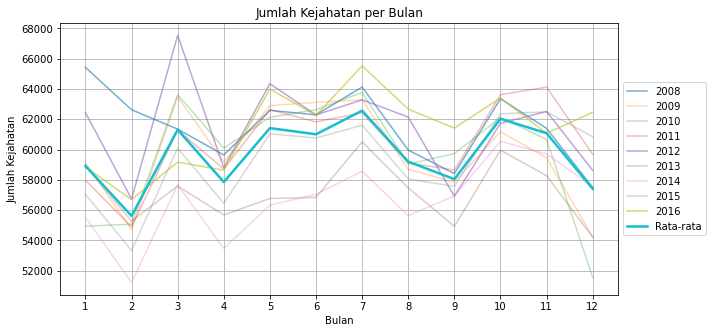

In [47]:
plt.figure(figsize=(10,5))

for year in crimesPerMonth.keys():
    if int(year) in [2008,2012,2016]:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.6)
    else:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.3)
plt.plot(range(12), cpmMatrix, label='Rata-rata', linewidth=2.5)
plt.xticks(range(len(df_new['month'].unique())), months)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kejahatan")
plt.title("Jumlah Kejahatan per Bulan")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#### --- Insight Line Plot ---

Dari grafik diatas dapat dilihat bahwa pada setiap bulannya dari tahun 2008 - 2016 jumlah kejahatan yang terjadi di Kota London mengalami kenaikan dan penurunan yang cukup signifikan. Namun pada bulan ke-3 atau Februari pada setiap tahunnya rerata pada grafik tersebut menunjukan adanya kenaikan yang cukup signifikan pada setiap tahunnya.

Sehingga dapat ditarik sebuah kesimpulan bahwa peralihan dari bulan 2 menuju bulan 3 adalah masa yang sangat berbahaya bagi warga yang berada di Kota London.

# 6. Visualisasi Menggunakan Scatter Plots


In [50]:
year_2016= df_new.loc[df_new['year']=='2016']
months = year_2016['month'].unique()
months.sort()

sum_months= year_2016.groupby(['month']).sum()
total= sum_months['value'].to_numpy()
name_of_month= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
print("Jumlah Kejatan Setiap Bulannya Pada Tahun 2016")
print(name_of_month)
print(total)
n= np.arange(len(months))
x_range= range(1,13)


Jumlah Kejatan Setiap Bulannya Pada Tahun 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']
[58847 63405 61064 62455 56697 59167 58637 63990 62262 65519 62666 61412]


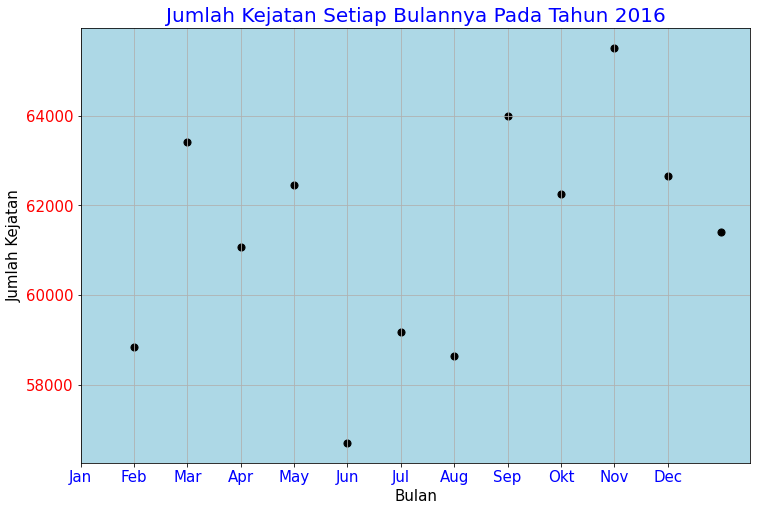

In [54]:
plt.figure(figsize=(12,8))
ax= plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x_range, total, s=50, c='black',cmap='varidis',alpha=1)
plt.title("Jumlah Kejatan Setiap Bulannya Pada Tahun 2016", color= 'blue', fontsize=20)
plt.xlabel("Bulan", fontsize=15)
plt.ylabel("Jumlah Kejatan", fontsize=15)
plt.xticks(n, name_of_month)
plt.xticks(color='blue', fontsize=15)
plt.yticks(color='red', fontsize=15)
plt.grid()

### --- Insight Scatter Plot ---

Terlihat pada visualisasi data menggunakan scatter plot diatas, bahwa pada tahun 2016 tingkat kejahatan yang paling tinggi atau banyak terjadi adalah pada bulan November.

# 7. Visualisasi Menggunakan Folium Maps

Pertanyaan

--- Daerah Mana yang Menjadi Daerah Paling Berbahaya di Kota London, dengan Tingkat Kejahatan Tertinggi? ---

Mas maaf saya gabisa install geopandas sama wordcloud saya udah coba segala macam cara tetep aja susah, pake gcollabs saya bingung load datanya maaf ya mas

# Permohonan Maaf

Maaf mas afif saya mengerjakan assigment ini, jujur sangat kesulitan dengan bentuk data yang ada. Ditambah kesibukan saya bekerja, dan melanjutkan studi sangat membuat saya hectic. Saya minta maaf apabila banyakk erro dalam assigmnet ini, saya berjanji akan terus belajar.